# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  Viz Visionaries  
Created by NAMES (SJSU IDs) : 016115515   
Last updated: 10/09/2025

In [15]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the folder containing the real CSV
data_path = "/Users/diyadoshi/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv"

df = pd.read_csv(data_path)

print(df.shape)
df.head()

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_7085/2576659535.py:9: DtypeWarning:

Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.



(2260701, 151)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

we had a lot of null values so we set a threshold to drop the columns with more than 95% null values. 

In [ ]:
# Drop columns with more than 95% missing
threshold = 0.95 * len(df)   # 95% of total rows
df = df.dropna(axis=1, thresh=threshold)

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)

bc_util                    76104
percent_bc_gt_75           75412
bc_open_to_buy             74968
mths_since_recent_bc       73445
pct_tl_nvr_dlq             70464
                           ...  
collection_recovery_fee       33
last_pymnt_amnt               33
loan_amnt                     33
last_fico_range_low           33
id                             0
Length: 88, dtype: int64


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

How does loan amount vary by grade - Distribution of Loan Amount by Credit Grade

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_7085/3680729669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="grade", y="loan_amnt", palette="Set2")


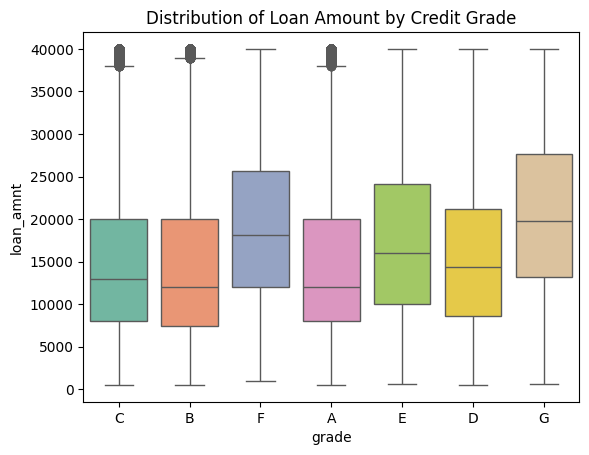

In [ ]:
# Your code here . . .
sns.boxplot(data=df, x="grade", y="loan_amnt", palette="Set2")
plt.title("Distribution of Loan Amount by Credit Grade")
plt.show()


### Q3: Come up with a another unique question. This question must use map() or apply()

Do longer-term loans (60 months) have higher average interest rates compared to shorter-term loans (36 months)?  

In [ ]:
# Your code here . . .
# Create a new column using map()
df["term_months"] = df["term"].map({" 36 months": 36, " 60 months": 60})

# Plot comparison
sns.barplot(data=df, x="term_months", y="int_rate", estimator="mean", palette="coolwarm")
plt.title("Average Interest Rate by Loan Term Length")
plt.xlabel("Loan Term (months)")
plt.ylabel("Average Interest Rate (%)")


/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_7085/772196939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="term_months", y="int_rate", estimator="mean", palette="coolwarm")


Text(0, 0.5, 'Average Interest Rate (%)')

### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [ ]:
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 22.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


In [ ]:
# Your code here . . .


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

In [ ]:
# Your code here . . .